In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
df_all = pd.read_csv('all_stocks_5yr.csv')

In [3]:
df = df_all[df_all.Name == 'AAL']
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [4]:
df1 = df.drop(['open', 'high', 'low', 'volume', 'Name'], axis = 1)
df1

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


In [5]:
def plotting(df, label):
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(np.arange(0, len(df['date'])+1, 200), rotation=40)
    plt.plot(df['date'], df['close'], label = label, color = 'blue')

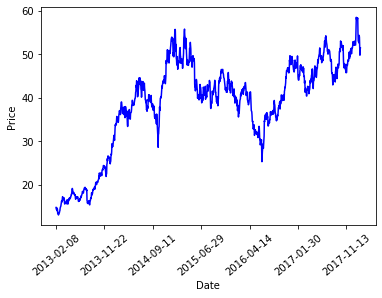

In [6]:
plotting(df1, 'Original')
plt.show()

In [7]:
#Determine rolling statistics
rolmean = df1.rolling(window=100).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df1.rolling(window=100).std()
print(rolmean,rolstd)

        close
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
1254  50.4273
1255  50.4897
1256  50.5244
1257  50.5662
1258  50.6183

[1259 rows x 1 columns]          close
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
1254  3.386868
1255  3.359240
1256  3.333241
1257  3.314756
1258  3.286098

[1259 rows x 1 columns]


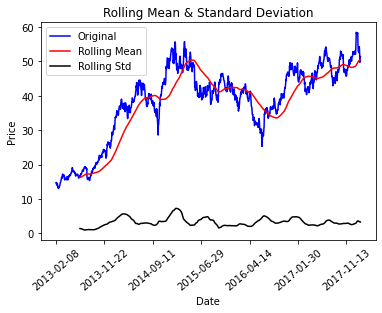

In [8]:
#Plot rolling statistics
orig = plotting(df1, 'Original')
mean = plt.plot(df1['date'], rolmean, color='red', label='Rolling Mean')
std = plt.plot(df1['date'], rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [9]:
from statsmodels.tsa.stattools import adfuller

#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

C:\Users\00136485\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\00136485\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Results of Dickey Fuller Test:
Test Statistic                   -2.066675
p-value                           0.258124
#Lags Used                        1.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


In [10]:
dftest

(-2.066674742785221,
 0.25812419970643674,
 1,
 1257,
 {'1%': -3.4355629707955395,
  '5%': -2.863842063387667,
  '10%': -2.567995644141416},
 3164.664272817721)

For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is large. The critical values are somewhat close to the Test Statistics. Let's say say that our Time Series at the moment is not stationary.

# Data Transformation to achieve Stationarity

There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

### 1. Log Scale Transformation

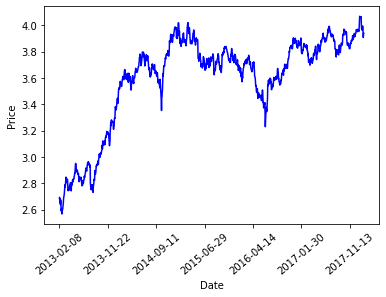

In [11]:
df1_logscale = pd.DataFrame()
df1_logscale['date'] = df['date']
df1_logscale['close'] = np.log(df['close'])

plotting(df1_logscale, '')
plt.show()

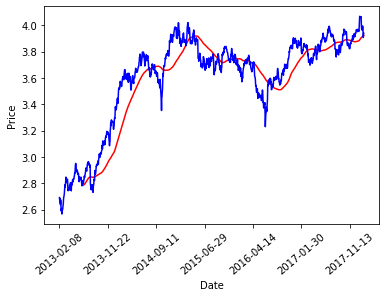

In [12]:
#The below transformation is required to make series stationary
movingAverage = df1_logscale.rolling(window=100).mean()
movingSTD = df1_logscale.rolling(window=100).std()

plt.plot(movingAverage, color='red')
plotting(df1_logscale, '')
plt.show()

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:

logscale (L) = stationarypart (L1) + trend (LT)  
movingavgoflogscale (A) = stationarypart (A1) + trend (AT)

resultseries (R) = (L−A) = (L1+LT)−(A1+AT) = (L1−A1)+(LT−AT).

Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1 , our final non-trend curve

In [13]:
datasetLogScaleMinusMovingAverage = df1_logscale['close'] - movingAverage['close']
df2 = pd.DataFrame()
df2['date'] = df1['date']
df2['close'] = datasetLogScaleMinusMovingAverage
df2.head(200)

,date,close
0,2013-02-08,NaN
1,2013-02-11,NaN
2,2013-02-12,NaN
3,2013-02-13,NaN
4,2013-02-14,NaN
...,...,...
195,2013-11-15,0.234387
196,2013-11-18,0.251482
197,2013-11-19,0.240600
198,2013-11-20,0.229967


In [14]:
#Remove NAN values
df2.dropna(inplace=True)
df2.head(10)

,date,close
99,2013-07-02,0.014133
100,2013-07-03,0.032151
101,2013-07-05,0.035986
102,2013-07-08,0.040192
103,2013-07-09,0.062992
104,2013-07-10,0.049939
105,2013-07-11,0.059714
106,2013-07-12,0.068511
107,2013-07-15,0.076967
108,2013-07-16,0.084663


In [15]:
def test_stationarity(timeseries, window):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window).mean()
    movingSTD = timeseries.rolling(window).std()
    
    #Plot rolling statistics
    orig = plotting(timeseries, 'Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

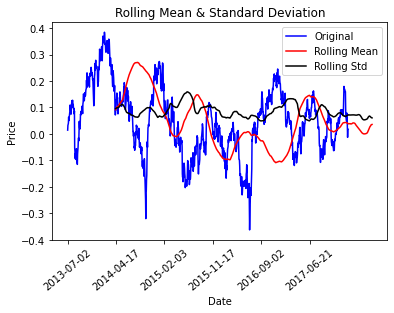

Results of Dickey Fuller Test:
Test Statistic                   -3.196206
p-value                           0.020205
#Lags Used                        1.000000
Number of Observations Used    1158.000000
Critical Value (1%)              -3.436010
Critical Value (5%)              -2.864039
Critical Value (10%)             -2.568101
dtype: float64


In [16]:
test_stationarity(df2, 100)

From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value has reduced from 0.258 to 0.02.
The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary.

But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.

Let us try out Exponential decay.

### 2.Exponential Decay Transformation

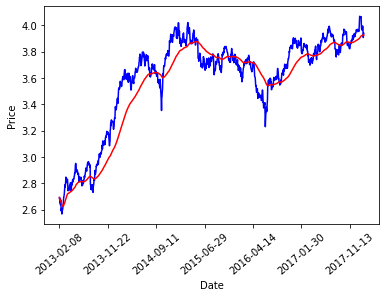

In [17]:
exponentialDecayWeightedAverage = df1_logscale.ewm(halflife=40, min_periods=0, adjust=True).mean()
plotting(df1_logscale, '')
plt.plot(exponentialDecayWeightedAverage, color='red')

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

In [18]:
datasetLogScaleMinusExponentialMovingAverage = df1_logscale['close'] - exponentialDecayWeightedAverage['close']
df2 = pd.DataFrame()
df2['date'] = df1['date']
df2['close'] = datasetLogScaleMinusExponentialMovingAverage

df2

,date,close
0,2013-02-08,0.000000
1,2013-02-11,-0.009842
2,2013-02-12,-0.015246
3,2013-02-13,0.008711
4,2013-02-14,-0.030189
...,...,...
1254,2018-02-01,0.060650
1255,2018-02-02,0.026591
1256,2018-02-05,-0.019030
1257,2018-02-06,0.008951


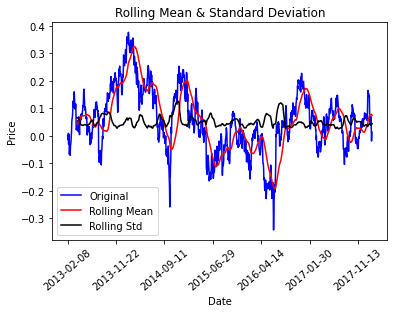

Results of Dickey Fuller Test:
Test Statistic                   -3.678079
p-value                           0.004432
#Lags Used                        1.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


In [19]:
test_stationarity(df2, 40)

We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.
Also,
1. p-value has decreased from 0.02 to 0.0044.
2. Test Statistic value is a bit farther to the Critical values.

Both the points say that our current transformation is as good as the previous logarithmic transformation. 
As tests couldn't confirm which is much better.

But lets try one more time & find if an even better solution exists. We will try out the simple time shift technique, which is simply:

Given a set of observation on the time series:
x0,x1,x2,x3,....xn 
The shifted values will be:
null,x0,x1,x2,....xn  <---- basically all xi's shifted by 1 pos to right

Thus, the time series with time shifted values are:
null,(x1−x0),(x2−x1),(x3−x2),(x4−x3),....(xn−xn−1)

### 3. Time Shift Transformation

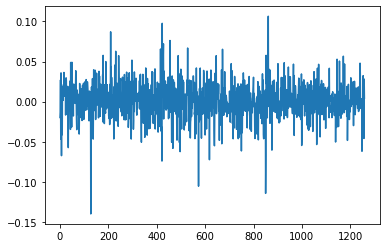

In [20]:
datasetLogDiffShifting = df1_logscale['close'] - df1_logscale['close'].shift()
plt.plot(datasetLogDiffShifting)

In [21]:
df2 = pd.DataFrame()
df2['date'] = df1['date']
df2['close'] = datasetLogDiffShifting
df2.dropna(inplace=True)
df2

,date,close
1,2013-02-11,-0.019857
2,2013-02-12,-0.013227
3,2013-02-13,0.026963
4,2013-02-14,-0.046780
5,2013-02-15,0.035806
...,...,...
1254,2018-02-01,-0.008133
1255,2018-02-02,-0.033594
1256,2018-02-05,-0.045954
1257,2018-02-06,0.028137


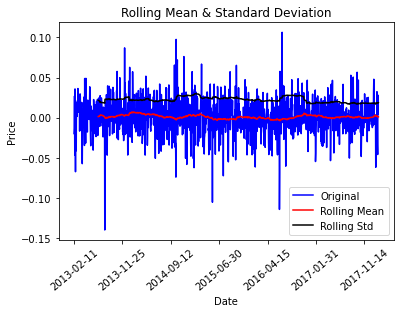

Results of Dickey Fuller Test:
Test Statistic                  -33.433269
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


In [22]:
test_stationarity(df2, 100)

From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary. But, the ADCF test shows us that:

1. p-value of 0 is very good.
2. But Test Statistic value is very far from the critical values.


Let's try a different shift value 10

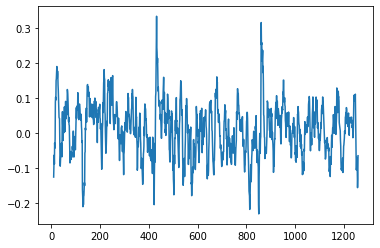

In [23]:
datasetLogDiffShifting10 = df1_logscale['close'] - df1_logscale['close'].shift(10)
plt.plot(datasetLogDiffShifting10)

In [24]:
df2 = pd.DataFrame()
df2['date'] = df1['date']
df2['close'] = datasetLogDiffShifting10
df2.dropna(inplace=True)
df2

,date,close
10,2013-02-25,-0.124756
11,2013-02-26,-0.086634
12,2013-02-27,-0.062159
13,2013-02-28,-0.087632
14,2013-03-01,-0.027538
...,...,...
1254,2018-02-01,-0.079529
1255,2018-02-02,-0.108312
1256,2018-02-05,-0.154954
1257,2018-02-06,-0.130082


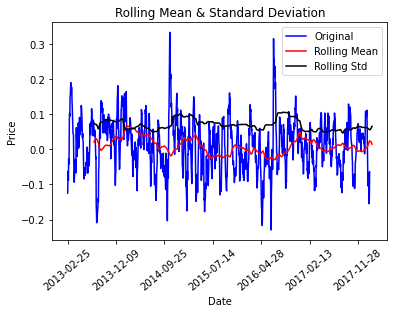

Results of Dickey Fuller Test:
Test Statistic                -5.948615e+00
p-value                        2.173978e-07
#Lags Used                     2.100000e+01
Number of Observations Used    1.227000e+03
Critical Value (1%)           -3.435691e+00
Critical Value (5%)           -2.863898e+00
Critical Value (10%)          -2.568026e+00
dtype: float64


In [25]:
test_stationarity(df2, 100)

Again not much improvement over previous tests

We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.



# Plotting ACF & PACF

C:\Users\00136485\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


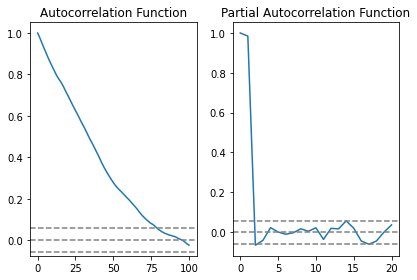

In [26]:
from statsmodels.tsa.stattools import acf, pacf

x = datasetLogScaleMinusMovingAverage[~np.isnan(datasetLogScaleMinusMovingAverage)]

#ACF & PACF plots
lag_acf = acf(x, nlags=100)
lag_pacf = pacf(x, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(x)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(x)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

In [27]:
lag_acf

array([ 1.00000000e+00,  9.84402898e-01,  9.67040550e-01,  9.48541517e-01,
        9.30971472e-01,  9.13851754e-01,  8.96767463e-01,  8.79817199e-01,
        8.63659758e-01,  8.48006939e-01,  8.33378751e-01,  8.18070245e-01,
        8.03612618e-01,  7.89825077e-01,  7.78112265e-01,  7.67402143e-01,
        7.55726630e-01,  7.42246630e-01,  7.27364587e-01,  7.12428671e-01,
        6.98738145e-01,  6.84289622e-01,  6.69277518e-01,  6.54608024e-01,
        6.40308713e-01,  6.25996367e-01,  6.12305014e-01,  5.98437054e-01,
        5.83471525e-01,  5.69042707e-01,  5.55765475e-01,  5.41782764e-01,
        5.27086447e-01,  5.11937869e-01,  4.96582202e-01,  4.82708981e-01,
        4.68975549e-01,  4.55234343e-01,  4.40357678e-01,  4.25740044e-01,
        4.11496564e-01,  3.95997109e-01,  3.79538409e-01,  3.65200315e-01,
        3.50735152e-01,  3.37819726e-01,  3.25564465e-01,  3.13250611e-01,
        3.01610743e-01,  2.90064655e-01,  2.79195557e-01,  2.68832362e-01,
        2.60008265e-01,  

In [28]:
lag_pacf

array([ 1.00000000e+00,  9.84452055e-01, -6.59400881e-02, -4.13714568e-02,
        2.21538723e-02,  4.11012246e-04, -1.08203031e-02, -3.62009138e-03,
        1.63893284e-02,  3.83177753e-03,  2.15086545e-02, -3.67426814e-02,
        1.87457153e-02,  1.60687678e-02,  5.63838130e-02,  1.93235836e-02,
       -4.50840965e-02, -6.11935904e-02, -4.49748924e-02, -2.51101471e-04,
        3.61511609e-02])

From the ACF graph, we see that curve touches y=0.0 line at x=95. Thus, from theory, Q = 95. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

# Building Models

Plotting AR model


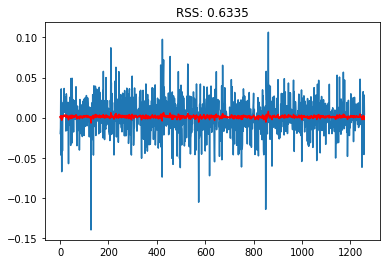

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
#making order=(3,1,0) gives RSS=1.5023
model = ARIMA(np.asarray(df1_logscale['close']), order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting[1:])**2))
print('Plotting AR model')

In [ ]:
#MA Model
model = ARIMA(df1_logscale['close'], order=(0,1,95))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting[1:])**2))
print('Plotting MA model')

In [ ]:
results_AR.fittedvalues

In [ ]:
results_MA.fittedvalues

In [ ]:
df1_logscale['close']

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(df1_logscale['close'], order=(2,1,95))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting[1:])**2))
print('Plotting ARIMA model')